In [2]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm          
sys.path.insert(0, '../Modules')
import erqMedSpec 
import erqScaling
from line_db import line_db
import os
from scipy import interpolate
from scipy.io import loadmat
from sklearn.neighbors import LocalOutlierFactor as LOF

# Reading data
# smp=Table.read('/home/reza/erq/sampling/org_sample2.fits')
smp=Table.read('../LumMatch/LumMatch.fits')
W3_0=smp['ABw3']
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
z_dr12=smp['z_dr12']
plate = smp['Plate']
mjd = smp['MJD']
fiberid= smp['FiberID']
iz_0 = iW3_0 - smp['r-w3'] + smp['r-z']
Lum_0 = smp['Lum']
np.savetxt('../IsoSurf/data3d.dat', np.array(list(zip(iW3_0, rew_0, kt80_0))))
data_0=np.array(list(zip(iW3_0, rew_0, kt80_0)))
(data, minData, rangeData) =  erqScaling.MinMaxScaler(data_0)

  0%|          | 0/21 [00:00<?, ?it/s]

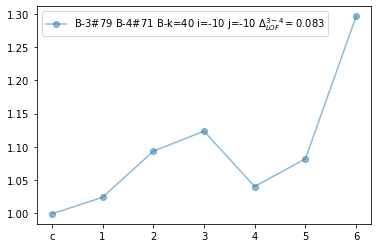

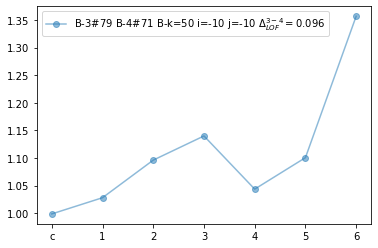

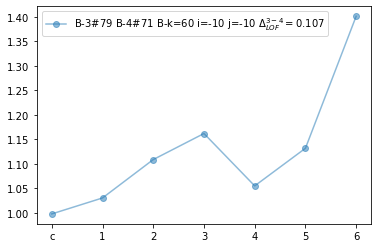

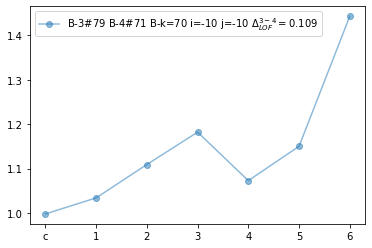

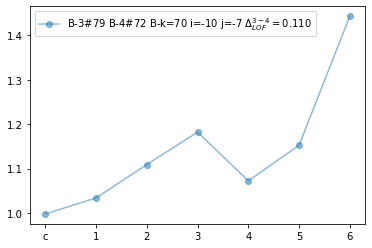

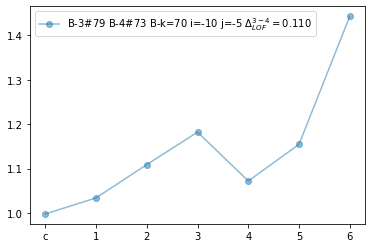

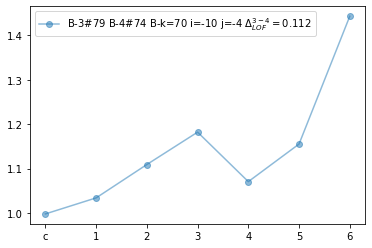

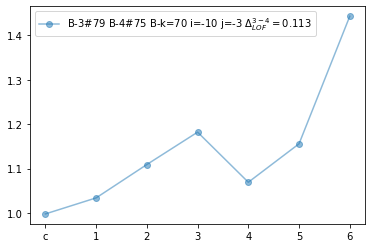

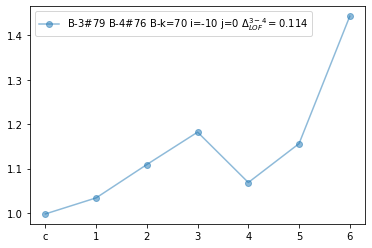

 19%|█▉        | 4/21 [03:05<13:28, 47.56s/it]

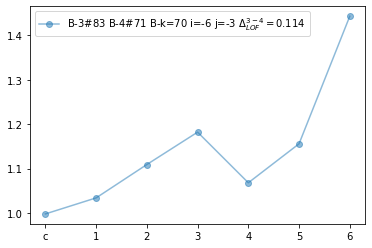

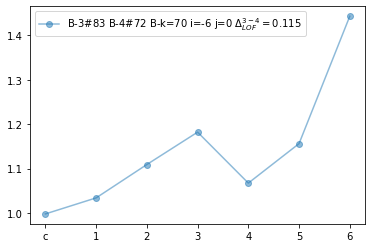

 24%|██▍       | 5/21 [03:50<12:30, 46.91s/it]

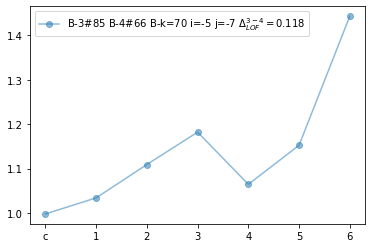

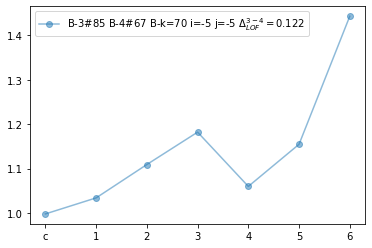

 29%|██▊       | 6/21 [04:56<13:08, 52.59s/it]

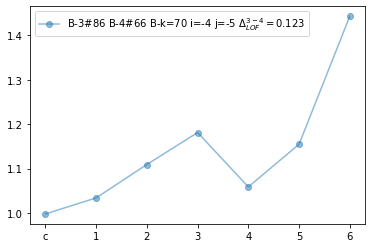

 33%|███▎      | 7/21 [05:45<12:01, 51.51s/it]

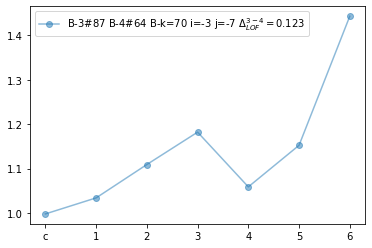

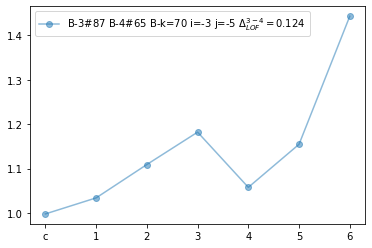

 38%|███▊      | 8/21 [06:44<11:38, 53.70s/it]

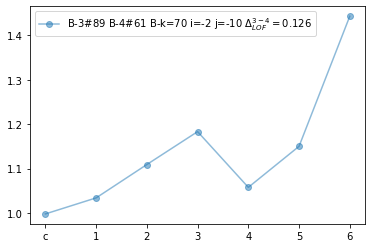

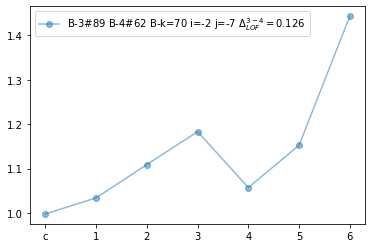

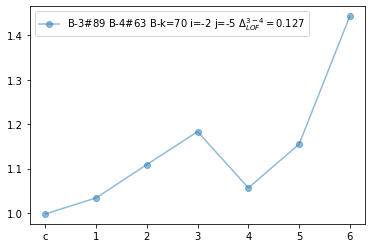

 43%|████▎     | 9/21 [07:30<10:18, 51.50s/it]

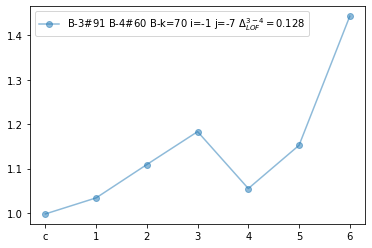

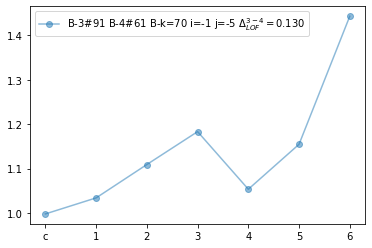

100%|██████████| 21/21 [18:24<00:00, 52.61s/it]


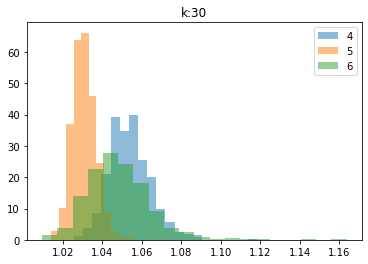

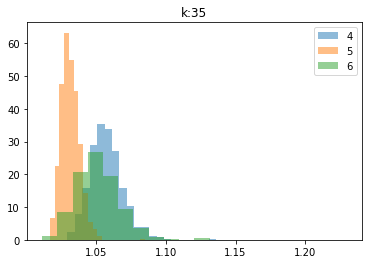

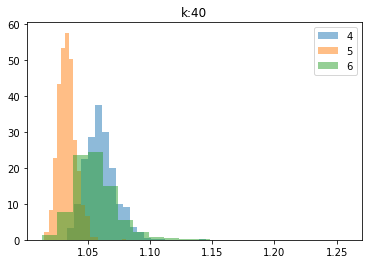

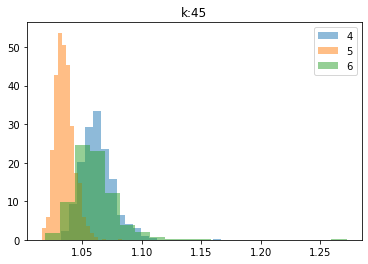

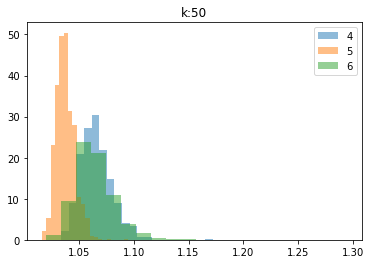

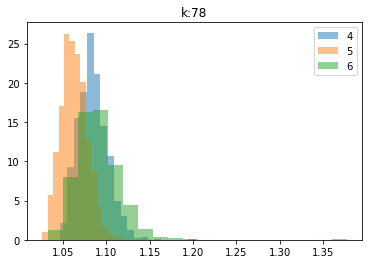

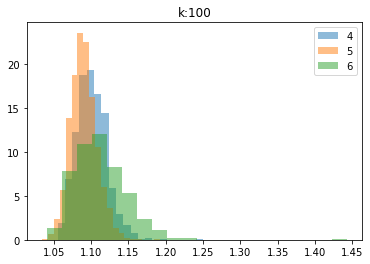

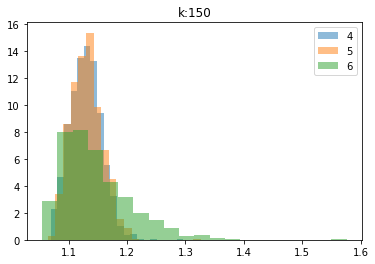

In [177]:
for k in [30,35,40,45, 50, 78, 100, 150]:
    DistLOFMedian = np.loadtxt('DistLOFMedian-k-%d'%k)
    for b in range(4,nBin-1):
        plt.hist(DistLOFMedian[:,b], bins=20, density=True, label='%d'%b, alpha=0.5)
    plt.title('k:%d'%k)
    plt.legend()
    plt.show()
            